# Question 1:
## Can the square feet of a property be predicted accuratley?

In [159]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *

from sklearn.cluster import KMeans # k-means
from sklearn.linear_model import LinearRegression, Ridge, Lasso # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score #model evaluation
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import silhouette_score

%matplotlib inline

In [127]:
houses = pd.read_csv("/Users/willstrauss/Documents/CPSC_Courses/CPSC_392/Data/OC_Rent_Address.csv")

houses.drop(["id","url", "region","region_url", "TransactionId", "Source", "ErrorMessage", "Version",
            "ComputedState", "ComputedZipPlus4", "ComputedAPN", "state", 
             "AUTO_UNIQUE_ID_2020-12-07_17tonksmigmailcom_OC_Housing", "UpdatedReverseGeocoding",
            "TimeTaken", "ComputedStreetAddress", "description", "laundry_options", "parking_options", "image_url"], axis = 1, inplace = True)

#creating dummy variables and merging the data frames
houses["log_price"] = np.log(houses["price"])
df = pd.get_dummies(houses["type"])

houses2 = [df, houses]
houses = pd.concat(houses2, axis = 1)

houses.dropna(inplace = True)

#removing outliers
zero_vals = houses[(houses['sqfeet'] > 2200)].index 
houses.drop(zero_vals, inplace = True) 

#remvoing 0 data
zero_vals = houses[(houses['sqfeet'] == 0)].index 
houses.drop(zero_vals, inplace = True) 

houses.head()

,apartment,condo,cottage/cabin,duplex,house,in-law,loft,manufactured,townhouse,price,...,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long,ComputedCity,ComputedZip,log_price
0,1,0,0,0,0,0,0,0,0,2310,...,1,1,0,0,0,33.8887,-117.994,Buena Park,90638.0,7.745003
1,1,0,0,0,0,0,0,0,0,3000,...,1,0,1,0,0,33.6829,-117.830,irvine,92614.0,8.006368
2,1,0,0,0,0,0,0,0,0,1805,...,0,1,0,0,0,33.6902,-117.899,COSTA MESA,92626.0,7.498316
3,1,0,0,0,0,0,0,0,0,2750,...,1,1,0,0,0,33.7155,-118.016,huntington beach,92647.0,7.919356
4,1,0,0,0,0,0,0,0,0,1695,...,1,1,0,0,0,33.6558,-117.666,LAKE FOREST,92630.0,7.435438


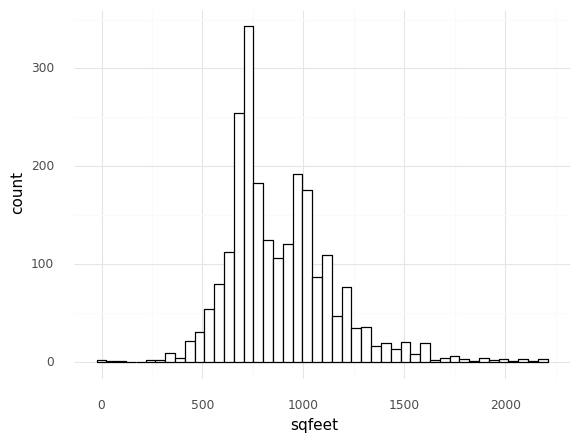

<ggplot: (8770517590598)>


In [135]:
print(ggplot(houses, aes("sqfeet")) + geom_histogram(color = "black", fill = "white") + theme_minimal())

In [128]:
feat = ["price", "beds", "baths", "comes_furnished", "electric_vehicle_charge", "dogs_allowed", "cats_allowed", "wheelchair_access", "smoking_allowed", "apartment", "condo", "townhouse", "cottage/cabin", "duplex", "house", "in-law", "loft", "manufactured"]

X = houses[feat]
y = houses["sqfeet"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

z = StandardScaler()

x_train[feat] = z.fit_transform(x_train[feat])
x_test[feat] = z.fit_transform(x_test[feat])


Train:  84.6403594172251
Test:  88.66399601898259


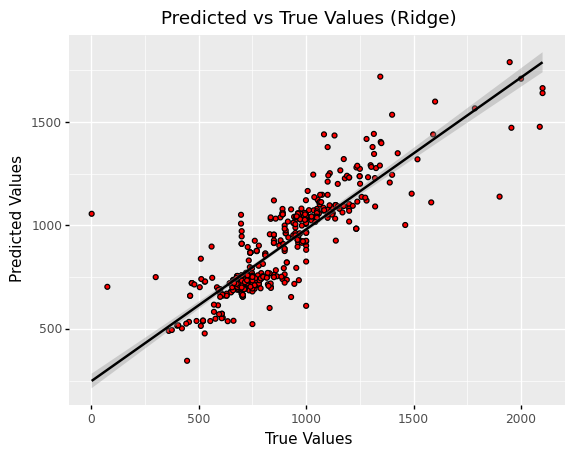

<ggplot: (8770513851046)>

In [148]:
rr = Ridge()

rr.fit(x_train, y_train)

preds_train = rr.predict(x_train)
preds_test = rr.predict(x_test)

results = pd.DataFrame({"Predicted Values": preds_test, "True Values": y_test})

print("Train: ", mean_absolute_error(y_train, preds_train))
print("Test: ", mean_absolute_error(y_test, preds_test))

(ggplot(results, aes(x = "True Values", y = "Predicted Values")) + 
 geom_point(fill = "red") + 
 geom_smooth(method = "lm") +
 ggtitle("Predicted vs True Values (Ridge)"))

Train:  84.87587090775803
Test:  88.71581579522865


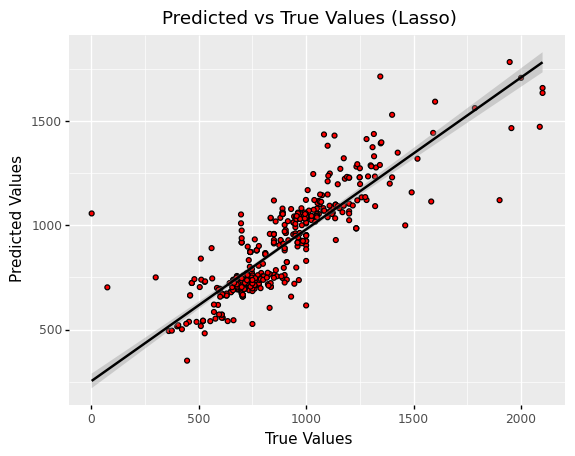

<ggplot: (8770519194046)>

In [149]:
lsr = Lasso()

lsr.fit(x_train, y_train)

preds_train = lsr.predict(x_train)
preds_test = lsr.predict(x_test)

results = pd.DataFrame({"Predicted Values": preds_test, "True Values": y_test})

print("Train: ", mean_absolute_error(y_train, preds_train))
print("Test: ", mean_absolute_error(y_test, preds_test))

(ggplot(results, aes(x = "True Values", y = "Predicted Values")) + 
 geom_point(fill = "red") + 
 geom_smooth(method = "lm") +
 ggtitle("Predicted vs True Values (Lasso)"))

## Answer:

The square feet of a property can be predicted very accuarely. A mean absolute error of 88 is very good considering the average square foot of a property is around 2-3000. As shown on the Lasso and Ridge predicted vs true graphs, there is a very strong linear relationship, meaning that the model predicted the square footage very accuratley. 

# Question 2:
## Can the price of a property be predicted accurately? 

In [150]:
houses = pd.read_csv("/Users/willstrauss/Documents/CPSC_Courses/CPSC_392/Data/OC_Rent_Address.csv")

houses.drop(["id","url", "region","region_url", "TransactionId", "Source", "ErrorMessage", "Version",
            "ComputedState", "ComputedZipPlus4", "ComputedAPN", "state", 
             "AUTO_UNIQUE_ID_2020-12-07_17tonksmigmailcom_OC_Housing", "UpdatedReverseGeocoding",
            "TimeTaken", "ComputedStreetAddress", "description", "laundry_options", "parking_options", "image_url"], axis = 1, inplace = True)

#creating dummy variables and merging the data frames
houses["log_price"] = np.log(houses["price"])
df = pd.get_dummies(houses["type"])

houses2 = [df, houses]
houses = pd.concat(houses2, axis = 1)

houses.dropna(inplace = True)

#removing outliers
zero_vals = houses[(houses['price'] > 10000)].index 
houses.drop(zero_vals, inplace = True) 

#remvoing 0 data
zero_vals = houses[(houses['price'] < 1)].index 
houses.drop(zero_vals, inplace = True) 

,apartment,condo,cottage/cabin,duplex,house,in-law,loft,manufactured,townhouse,price,...,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long,ComputedCity,ComputedZip,log_price
0,1,0,0,0,0,0,0,0,0,2310,...,1,1,0,0,0,33.8887,-117.994,Buena Park,90638.0,7.745003
1,1,0,0,0,0,0,0,0,0,3000,...,1,0,1,0,0,33.6829,-117.830,irvine,92614.0,8.006368
2,1,0,0,0,0,0,0,0,0,1805,...,0,1,0,0,0,33.6902,-117.899,COSTA MESA,92626.0,7.498316
3,1,0,0,0,0,0,0,0,0,2750,...,1,1,0,0,0,33.7155,-118.016,huntington beach,92647.0,7.919356
4,1,0,0,0,0,0,0,0,0,1695,...,1,1,0,0,0,33.6558,-117.666,LAKE FOREST,92630.0,7.435438


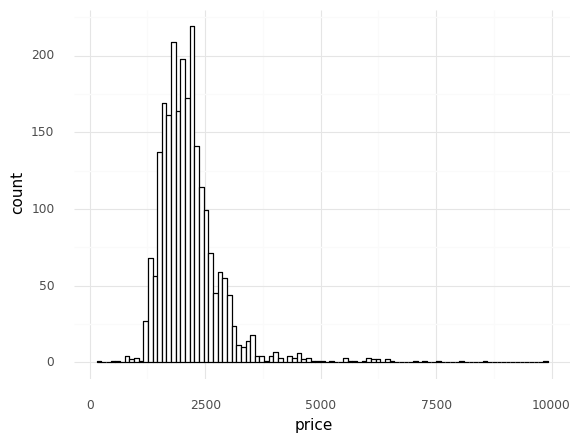

<ggplot: (8770513570443)>


In [151]:
print(ggplot(houses, aes("price")) + geom_histogram(color = "black", fill = "white") + theme_minimal())

In [152]:
predictors = ["sqfeet", "beds", "baths", "comes_furnished", "electric_vehicle_charge", "dogs_allowed", "cats_allowed", "wheelchair_access", "smoking_allowed", "apartment", "condo", "townhouse", "cottage/cabin", "duplex", "house", "in-law", "loft", "manufactured"]

x_train, x_test, y_train, y_test = train_test_split(houses[predictors], houses["price"], test_size = 0.2)

model = LinearRegression()
model.fit(x_train, y_train)

train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

In [153]:
r2_score(y_train, train_pred)

0.5472839966562612

In [154]:
r2_score(y_test, test_pred) 

0.64869070362

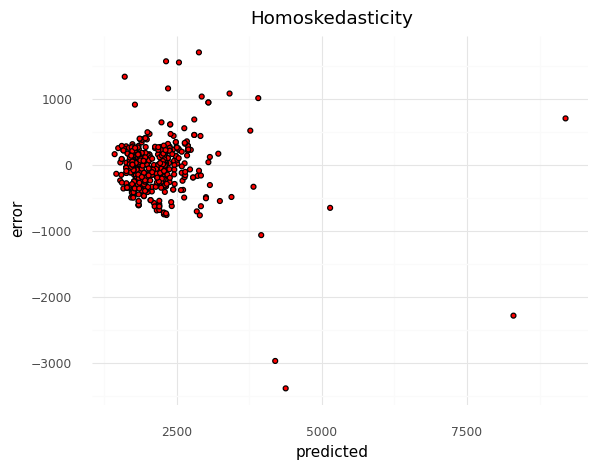

<ggplot: (8770516373191)>

In [155]:
assump = pd.DataFrame({"error": y_test - test_pred, "predicted": test_pred})
ggplot(assump, aes(x = "predicted", y = "error")) + geom_point(color = "black", fill = "red") + ggtitle("Homoskedasticity") + theme_minimal() 

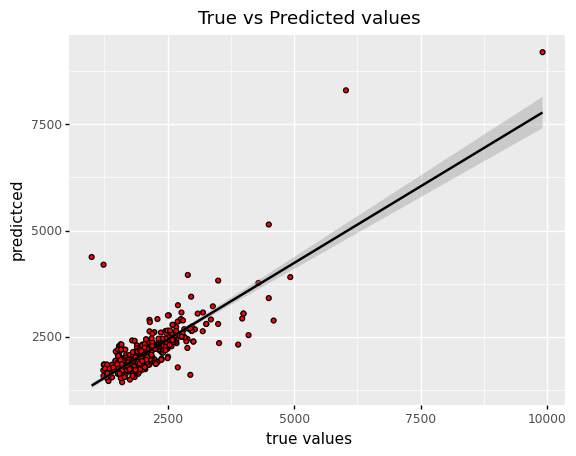

<ggplot: (8770516969572)>

In [156]:
true_vs_pred = pd.DataFrame({"predictced": test_pred, "true values": y_test })
true_vs_pred.head()

(ggplot(true_vs_pred, aes(x = "true values", y = "predictced")) + geom_point(color = "black", fill = "red") + 
      geom_smooth(method = "lm") + ggtitle("True vs Predicted values"))

In [158]:
coefficients = pd.DataFrame({"Coef": model.coef_, "Name": predictors})
coefficients = coefficients.append({"Coef": model.coef_, "Name": "Intercept"}, ignore_index = True)
coefficients

,Coef,Name
0,1.22758,sqfeet
1,-37.2003,beds
2,147.579,baths
3,269.252,comes_furnished
4,150.49,electric_vehicle_charge
5,163.632,dogs_allowed
6,-81.3113,cats_allowed
7,66.634,wheelchair_access
8,-69.7965,smoking_allowed
9,-315.347,apartment


## Answer:

The model is decent at predicting thr price of a property. The r2 is in the high 50s for both the testing and training data. The model is slightly underfit as well. The biggest issue seems to be that the model is not good at predicting larger variables. On the Homoskedasticity plot, we can see that the error increases the higher the rent price is. The same is true in the predicted vs true values graph. 

# Question 3
## What is the relationship between price and square feet?

In [160]:
houses = pd.read_csv("/Users/willstrauss/Documents/CPSC_Courses/CPSC_392/Data/OC_Rent_Address.csv")

houses.drop(["id","url", "region","region_url", "TransactionId", "Source", "ErrorMessage", "Version",
            "ComputedState", "ComputedZipPlus4", "ComputedAPN", "state", 
             "AUTO_UNIQUE_ID_2020-12-07_17tonksmigmailcom_OC_Housing", "UpdatedReverseGeocoding",
            "TimeTaken", "ComputedStreetAddress", "description", "laundry_options", "parking_options", "image_url"], axis = 1, inplace = True)

#creating dummy variables and merging the data frames
df = pd.get_dummies(houses["type"])

houses2 = [df, houses]
houses = pd.concat(houses2, axis = 1)

houses.dropna(inplace = True)

#removing outliers
zero_vals = houses[(houses['price'] > 30000)].index 
houses.drop(zero_vals, inplace = True) 

#remvoing 0 data
zero_vals = houses[(houses['price'] < 1)].index 
houses.drop(zero_vals, inplace = True) 

#Creating a log version of price because data is distributed logarithmically
houses["log_price"] = np.log(houses["price"])

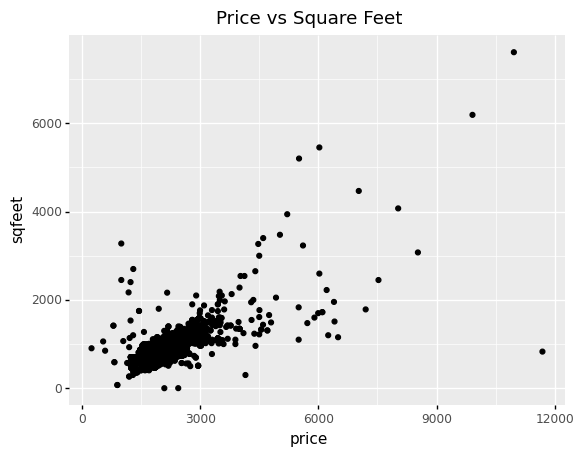

<ggplot: (8770515846072)>


In [161]:
print(ggplot(houses, aes(x = 'price', y = 'sqfeet')) + geom_point() + ggtitle("Price vs Square Feet"))

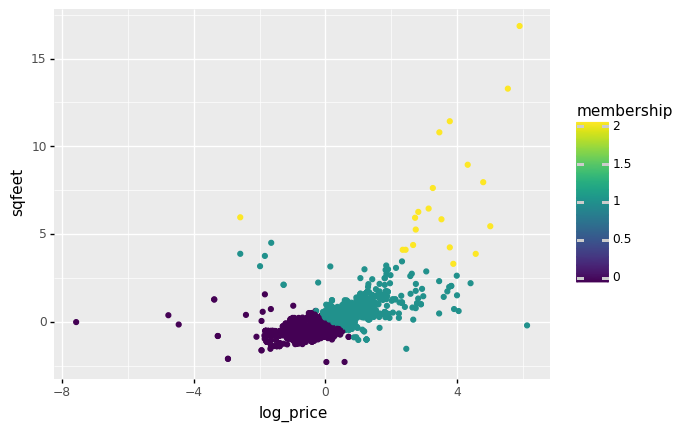

<ggplot: (8770518960059)>
0.57358774948055


In [162]:
features = ["log_price", "sqfeet"]

X = houses[features]

z = StandardScaler()

X[features] = z.fit_transform(X)

km = KMeans(n_clusters = 3)
km.fit(X)

membership = km.predict(X)

X['cluster'] = membership

print(ggplot(X, aes('log_price', 'sqfeet', color = 'membership')) + geom_point())

print(silhouette_score(X, membership))

## Answer:

This model does a decent job at showing the relationship between square feet and price. The K-Means clustering algorithm created 3 groups based on square feet and price. The sillhouete score is decent at 0.54. This means that there is a relationship betweem price and square feet. The purple cluster is made up of properties with lower square feet that cost less. The blue group is made up of properties with less square feet but that range in price from high to low. This probably includes mostly apartments. The yellow group is high square feet and high cost properties. 